# Классификация при помощи ДПР
## Babich Nikita. Z4100, FTF, ITMO

# Описание набора данных

В этой лабораторной работе мы рассмотрим разные подходы к задаче классификации, в частности, деревья принятия решений, а также поговорим о том, как бороться с несбалансированностью датасета.

Изучаемый нами набор данных — это набор данных о принятых предложениях по кредитам в банке **Thera-Bank**. Основные клиенты банка пользуются банком для того, чтобы разместить в нем свои денежные средства, то есть являются вкладчиками. В то же время, большую прибыль банку приносят кредиторы — люди, берущие в банке кредит. Поэтому банк хочет сформировать для своих вкладчиков выгодные предложения по кредиту. Кампания, проведенная банком для вкладчиков в прошлом году, показала, что коэффициент конверсии составил более 9,6%. Это побудило отдел маркетинга разработать кампании с улучшенным целевым маркетингом, чтобы увеличить вероятность успеха при, естественно, минимальном бюджете. Департамент хотел бы разработать классификатор, который поможет им определить потенциальных клиентов, которые с большей вероятностью приобретут кредит. Это повысит вероятность успеха при одновременном снижении стоимости кампании.

Набор данных содержит как информацию о клиенте, так и информацию о его реакции на кампанию предыдущего года:

*   **ID**: ID клиента

*   **Age**: Возраст (полных лет)

*   **Experience**: Стаж

*   **Income**: Годовой доход (в тысячах)

*   **ZIP Code**: Индекс места проживания

*   **Family**: Количество членов семьи

*   **CCAvg**: Средние траты в месяц по кредитной карте (в тысячах)

*   **Education**: Уровень образования (1: бакалавр, 2: магистр, 3: что-то большее)

*   **Mortgage**: Стоимость ипотеки, если имеется (в тысячах)

*   **Securities Account**: Наличие счета в ценных бумагах

*   **CD Account**: Наличие сертификата на депозит

*   **Online**: Использует ли клиент интернет-банкинг

*   **CreditCard**: Использует ли клиент кредитную карту, выпущенную данным банком

*   **Personal Loan**: Принял ли клиент персональное предложение по кредиту (целевая переменная)

# Разведочный анализ данных

Считайте набор данных в датафрейм

In [1]:
from sklearn.tree import DecisionTreeClassifier

При помощи метода <code>.describe()</code> изучите набор данных «с высоты птичьего полета».

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('Bank_Personal_Loan_Modelling_train.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,409,60,36,89,91745,2,2.8,1,0,0,0,0,1,0
1,3738,44,19,30,91423,1,0.5,3,0,0,0,0,1,0
2,3890,26,0,19,93014,1,0.1,2,121,0,0,0,1,0
3,569,34,9,41,92101,2,0.1,1,161,0,0,0,1,1
4,1042,56,32,51,92780,4,1.5,1,0,0,0,0,0,0


In [3]:
print(len(df))

import seaborn as sns

4000


In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2497.682500,45.429500,20.196250,73.479750,93156.583750,2.381750,1.921805,1.881500,55.968250,0.096000,0.104000,0.061500,0.599000,0.29050
std,1449.723807,11.489235,11.500143,46.321345,2197.762636,1.149716,1.738974,0.842102,101.054887,0.294628,0.305299,0.240275,0.490162,0.45405
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1245.750000,35.000000,10.000000,38.000000,91941.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2492.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,3767.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
from matplotlib import pyplot as plt

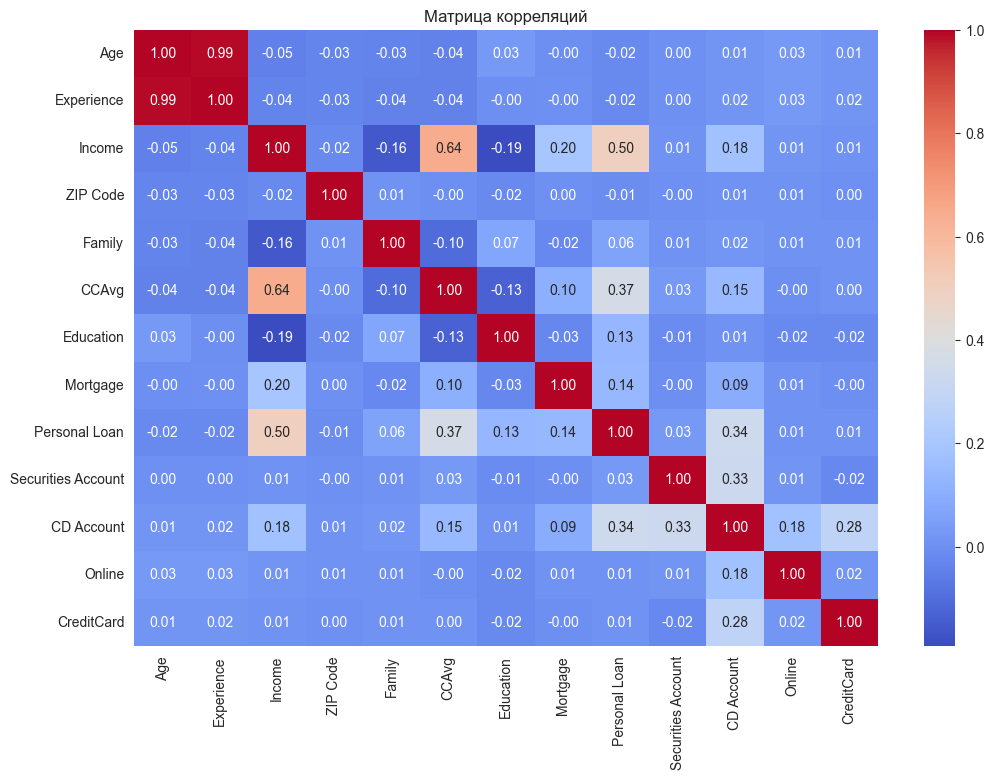

Наиболее коррелированные переменные: Age, Experience


In [6]:
# Удаление колонки ID
df.drop('ID', axis=1, inplace=True)

# Построение матрицы корреляций
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

# Поиск наиболее коррелированных переменных
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
# Убираем самосвязи (корреляция 1)
correlation_pairs = correlation_pairs[correlation_pairs < 1]
most_correlated = correlation_pairs.idxmax()  # Пара с максимальной корреляцией
print(f'Наиболее коррелированные переменные: {most_correlated[0]}, {most_correlated[1]}')

In [7]:

print(f'Наиболее коррелированные переменные: {most_correlated[0]}, {most_correlated[1]}')

Наиболее коррелированные переменные: Age, Experience


In [8]:
correlation_matrix.unstack().sort_values(ascending=True)

Income      Education    -0.192029
Education   Income       -0.192029
Family      Income       -0.156319
Income      Family       -0.156319
Education   CCAvg        -0.133361
                            ...   
ZIP Code    ZIP Code      1.000000
Income      Income        1.000000
Experience  Experience    1.000000
Online      Online        1.000000
CreditCard  CreditCard    1.000000
Length: 169, dtype: float64

In [9]:
# Найдем среднюю абсолютную корреляцию для каждого признака
# Убираем самосвязи (корреляцию с самим собой)
abs_correlation = correlation_matrix.abs().mean(axis=1)

# Находим признак с наименьшей средней абсолютной корреляцией
least_correlated_feature = abs_correlation.idxmin()

print(f'Признак, который меньше всего коррелирует с остальными: {least_correlated_feature}')

# Удаление этого признака из DataFrame
df.drop(columns=[least_correlated_feature], inplace=True)

# Проверка, что признак удален
print(f'Оставшиеся признаки: {df.columns.tolist()}')

Признак, который меньше всего коррелирует с остальными: ZIP Code
Оставшиеся признаки: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [10]:
min_exp = abs(min(df['Experience']))
df['Experience'] += min_exp

In [11]:
df.Experience

0       39
1       22
2        3
3       12
4       35
        ..
3995    14
3996    13
3997    34
3998    18
3999     8
Name: Experience, Length: 4000, dtype: int64

In [12]:
df.Experience.mean()

23.19625

In [13]:
min_ccavg = abs(min(df['CCAvg']))
df['CCAvg'] += min_ccavg
print(df.CCAvg.mean())

1.9218050000000002


In [14]:
min(df.CCAvg)

0.0

Набор данных содержит 14 переменных, 1 из которых является целевой.

1 номинальная переменная: **ID**

5 числовых переменных: **Age**, **Experience**, **Income**, **CCAvg**, **Mortgage**

3 категориальные переменных: **Family**, **Education**, **ZIP Code**

5 булевых переменных: **Personal Loan**, **Securities Account**, **CD Account**, **Online**, **CreditCard**

Пропущенных значений нет.

Experience содержит какие-то отрицательные значения

## Определение выбросов

Постройте ящики с усами для всех предикторов. Рекомендуем использовать <code>sns.boxplot()</code>. Определите признак по изображению boxplot из вашего варианта.

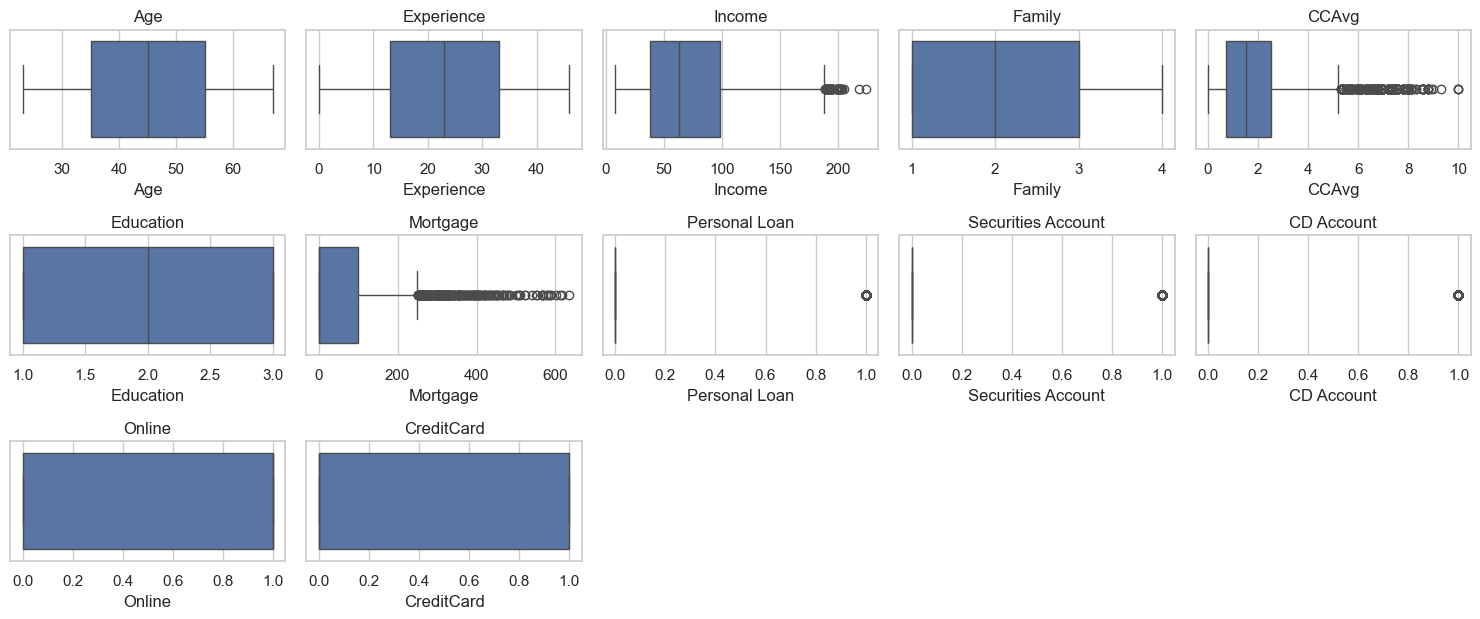

In [15]:
# Установка стиля графиков
sns.set_theme(style="whitegrid")

# Построение ящиков с усами для всех предикторов
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(5, 5, i + 1)  # Измените количество строк и столбцов по мере необходимости
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Определите признак, содержащий наибольшее число выбросов. Введите название этого признака.


Имеет смысл поработать с этим признаком, а для этого стоит руководствоваться следующими статистическими соображениями. Если вычесть из данных выборочное среднее, а после поделить на среднеквадратическое отклонение, то, пользуясь правилом 3-$\sigma$ для нормального распределения, можно выбросить слишком далекие от нуля хвосты. Постройте гистограмму распределения значений в рамках этого признака.

Выборочное среднее: 55.96825
Среднеквадратическое отклонение: 101.0548873855373
Границы для выбросов: [-247.19641215661187, 359.1329121566119]


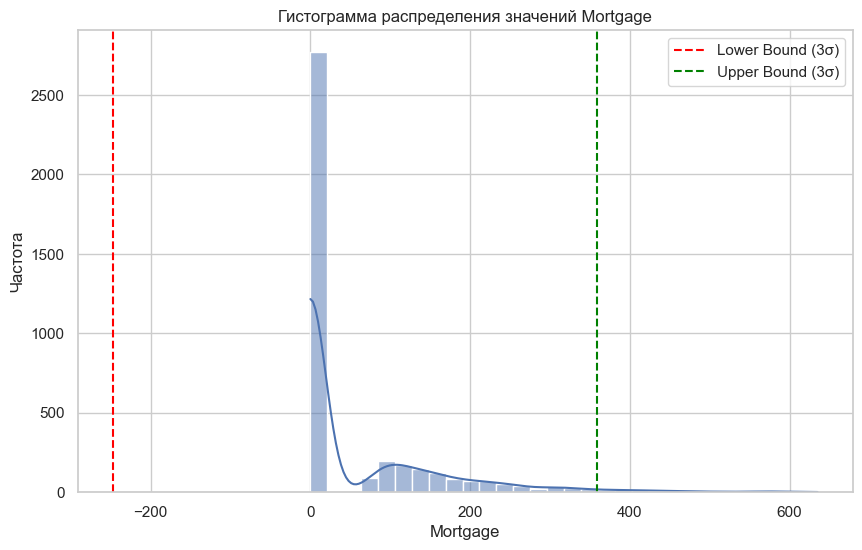

In [16]:
feature_with_outliers = 'Mortgage'
mean_value = df[feature_with_outliers].mean()
std_value = df[feature_with_outliers].std()

# Определение границ для выбросов по правилу 3-сигм
lower_bound = mean_value - 3 * std_value
upper_bound = mean_value + 3 * std_value

print(f'Выборочное среднее: {mean_value}')
print(f'Среднеквадратическое отклонение: {std_value}')
print(f'Границы для выбросов: [{lower_bound}, {upper_bound}]')

plt.figure(figsize=(10, 6))
sns.histplot(df[feature_with_outliers], bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound (3σ)')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound (3σ)')
plt.title(f'Гистограмма распределения значений {feature_with_outliers}')
plt.xlabel(feature_with_outliers)
plt.ylabel('Частота')
plt.legend()
plt.show()

Очевидно в рамках этого признака есть небольшое количество значений, которые лежат далеко. Можно использовать <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html"><code>z-score</code></a> функцию из библиотеки <code>scipy</code>. 

Вспомнив курс теории вероятностей, становится понятно, что около $99.7\%$ нормального распределения сождержатся в отрезке $[-3\sigma, 3\sigma]$. Определите число элементов, модуль <code>z-score</code> которых больше, чем $3$. 

In [17]:
from scipy.stats import zscore

In [18]:
z_scores = zscore(df[feature_with_outliers])
outlier_count = len([z for z in z_scores if abs(z) > 3])
df['z_score'] = z_scores
df_filtered = df[(df['z_score'].abs() <= 3)]
remaining_rows = df_filtered.shape[0]

print(f'Количество оставшихся строк в датасете: {remaining_rows}')
print(f'Количество элементов, модуль z-score которых больше 3: {outlier_count}')

Количество оставшихся строк в датасете: 3917
Количество элементов, модуль z-score которых больше 3: 83


Итак, выбросов не очень множко, поэтому выбросите их из набора данных. Введите оставшееся в датасете число строк.

# Построение моделей

# Базовый алгоритм

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [19]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df.drop(columns='Personal Loan'),
    df['Personal Loan'],
    test_size=0.2, random_state=21, 
    stratify=df['Personal Loan']
)

print(X_train)
print(X_test)

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
1532   64          41      92       1    2.0          1         0   
3158   33          11     122       1    0.0          1         0   
1897   32           9      51       4    0.2          1       154   
2342   30           7      39       1    1.5          1         0   
3144   51          30      38       2    1.0          3       164   
...   ...         ...     ...     ...    ...        ...       ...   
2534   60          38      29       3    1.3          2         0   
1073   62          40      50       3    1.5          1       169   
1011   59          36      41       4    2.5          1       174   
1272   33          11     178       3    8.5          1         0   
73     26           3     132       3    6.5          3         0   

      Securities Account  CD Account  Online  CreditCard   z_score  
1532                   0           0       1           0 -0.553909  
3158                   0         

In [20]:
from sklearn import metrics

In [21]:
model = DecisionTreeClassifier(random_state=21, criterion='gini')
model.fit(X_train, y_train)

# Оценка модели на тестовых данных
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
report = metrics.classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       723
           1       0.89      0.86      0.87        77

    accuracy                           0.98       800
   macro avg       0.94      0.92      0.93       800
weighted avg       0.98      0.98      0.98       800



In [22]:
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score (weighted): {f1}')

F1 Score (weighted): 0.9760386587690073


In [23]:
model = DecisionTreeClassifier(random_state=21, criterion='entropy')
model.fit(X_train, y_train)

# Оценка модели на тестовых данных
y_pred = model.predict(X_test)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score (weighted): {f1}')

F1 Score (weighted): 0.9773675123582437


Обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [24]:
model = DecisionTreeClassifier(random_state=21, criterion='gini', class_weight='balanced')
model.fit(X_train, y_train)

# Оценка модели на тестовых данных
y_pred = model.predict(X_test)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score (weighted): {f1}')

F1 Score (weighted): 0.9709941658782718


In [25]:
model = DecisionTreeClassifier(random_state=21, criterion='entropy', class_weight='balanced')
model.fit(X_train, y_train)

# Оценка модели на тестовых данных
y_pred = model.predict(X_test)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score (weighted): {f1}')

F1 Score (weighted): 0.98


А теперь, если вспомнить, что выборка несбалансирована, то можно указать дополнительный параметр <code>class_weight</code>. Обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

## Upsampling обучающей выборки

Помимо очевидного присвоения весов несбалансированным классам, можно воспользоваться алгоритмом <code>SMOTE</code>. Ему на вход подаются экземпляры всех классов с их метками, а он в свою очередь пытается на их основе экстраполировать само распределение данных этого класса. После этого он сэмплирует новые объекты классов так, пока количество строк каждого класса не станет везде одинаковым.

Получается, что в таком случае будет получена сбалансированная выборка, и пропадет нужда как-то ухищряться с весами и прочим. 

Определите долю элементов класса $0$ тренировочного набора данных.

In [27]:
# < ENTER YOUR CODE HERE > 

Используя класс <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html"><code>SMOTE</code></a> из модуля <code>imblearn.over_sampling</code> сбалансируйте обучающую выборку с параметрами, указанными в вашем варианте.

In [28]:
# < ENTER YOUR CODE HERE > 

Убедитесь, что теперь в выборке содержится одинаковое число представителей обоих классов. Введите количество объектов класса $1$.

In [29]:
# < ENTER YOUR CODE HERE > 

Снова обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [30]:
# < ENTER YOUR CODE HERE > 